# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_data_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_data.merge(study_results, how="inner", on="Mouse ID")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(merged_data["Mouse ID"].value_counts())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_no_of_mice = len(clean["Mouse ID"].value_counts())
clean_no_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats = pd.DataFrame({"Mean Tumour Volume": regimen_mean, "Median Tumour Volume":regimen_median, "Tumour Volume Variance":regimen_variance, "Tumour Volume Std. Dev.": regimen_std, "Tumour Volume Std. Err.": regimen_sem})

summary_stats


,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

single_groupby = clean.groupby(["Drug Regimen"])
summary_stats1 = single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

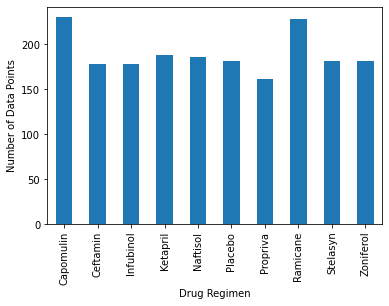

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_of_mice_per_drug = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
# no_of_mice_per_drug
bar_chart = no_of_mice_per_drug.plot.bar(x="Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_number =(merged_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_number

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

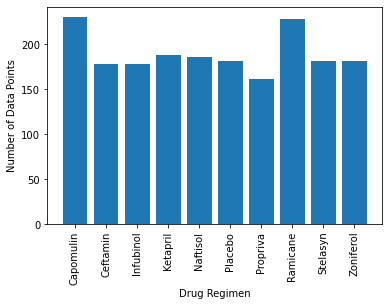

In [11]:
x_axis = np.arange(len(no_of_mice_per_drug))
plt.bar(x_axis, mice_number)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_data.groupby(["Mouse ID","Sex"])
gender = pd.DataFrame(gender.size())

gender_split = pd.DataFrame(gender.groupby(["Sex"]).count())
gender_split

,0
Sex,
Female,124
Male,125


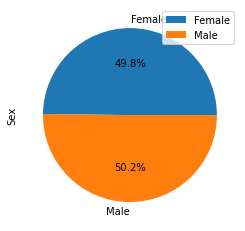

In [13]:
plot = gender_split.plot.pie(y=0, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

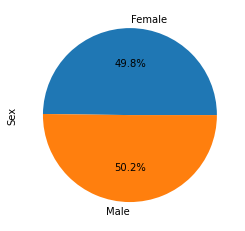

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.8, 50.2]
plt.pie(sizes, labels=labels, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_sorted = merged_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last = merged_data.loc[merged_data["Timepoint"] == 45]
last.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1


In [25]:
capomulin = last[last["Drug Regimen"].isin(["Capomulin"])]
capomulin.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,19,s185,Capomulin,Female,3,17,45,23.343598,1
1,29,x401,Capomulin,Female,16,15,45,28.484033,0
2,39,m601,Capomulin,Male,22,17,45,28.430964,1
3,104,u364,Capomulin,Male,18,17,45,31.023923,3
4,124,y793,Capomulin,Male,17,17,45,31.896238,2


In [17]:
ramicane = last[last["Drug Regimen"].isin(["Ramicane"])]
ramicane.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,49,g791,Ramicane,Male,11,16,45,29.128472,1
2,59,s508,Ramicane,Male,1,17,45,30.276232,0
3,74,m546,Ramicane,Male,18,16,45,30.564625,1
4,84,z578,Ramicane,Male,11,16,45,30.638696,0


In [18]:
infubinol = last[last["Drug Regimen"].isin(["Infubinol"])]
infubinol.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [32]:
ceftamin = last[last["Drug Regimen"].isin(["Ceftamin"])]
ceftamin.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


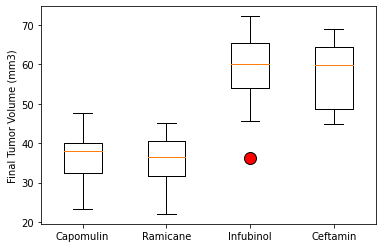

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = new_sorted.loc[new_sorted["Mouse ID"] == "x401",:]
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


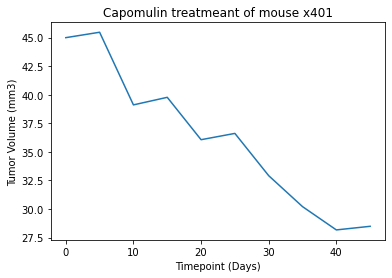

In [99]:
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse x401')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [73]:
new_capo = new_sorted.loc[new_sorted["Drug Regimen"] == "Capomulin",:]
new_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2


In [79]:
weight_vs_tumor = new_capo.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_vs_tumor.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
300,b128,22,45.000000
301,b128,22,45.651331
302,b128,22,43.270852
303,b128,22,43.784893
304,b128,22,42.731552


In [92]:
avg = pd.DataFrame(weight_vs_tumor.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [93]:
avg = avg.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


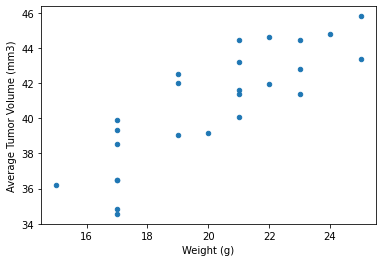

In [97]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4))
plt.show()

## Correlation and Regression

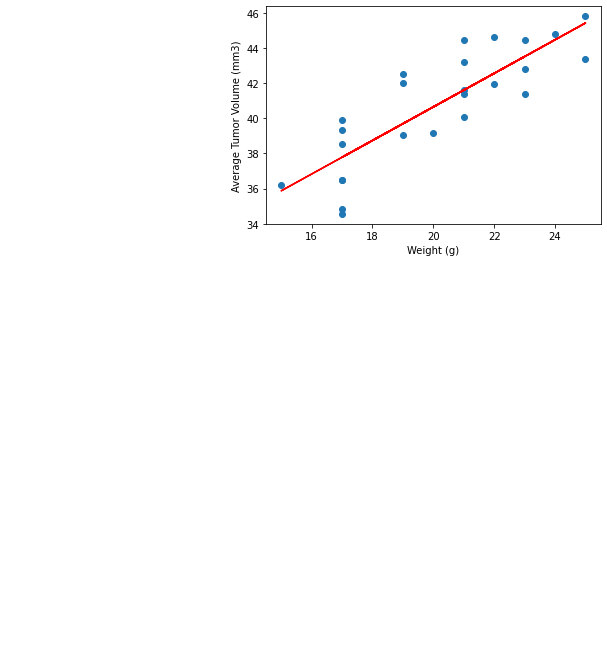

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg["Weight (g)"]
y_values = avg["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()